# Objective 01 - get and interpret the confusion matrix for classification models

In [18]:
#import the necessary modules
import numpy as np
import pandas as pd

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

# load the digits data
# The default with 10 classes (digits 0-9)
digits=datasets.load_digits(n_class=10)

#create the feature matrix
X=digits.data

#create the target array
y=digits.target

#split the datainto a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#instantiate and train a decision tree classifier
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)

Text(0.5, 1.0, 'Confusion Matrix: Digits decision tree model')

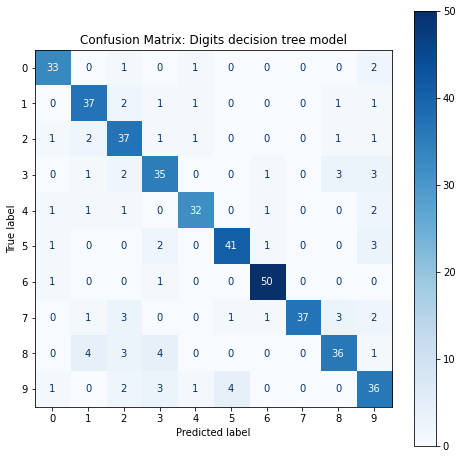

In [19]:
import matplotlib.pyplot as plt

# plot the decision matrix
fig, ax = plt.subplots(1,1,figsize=(8,8))

plot_confusion_matrix(dt_classifier, X_test, y_test, display_labels=digits.target_names,cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix: Digits decision tree model')

# Objective 02 - use the classification metrics of precision and recall



In [20]:
#use the first four digits (0-3)
digits = datasets.load_digits(n_class=4)

#create the feature and target
X = digits.data
y = digits.target

#split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#instantiate and train a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)


Text(0.5, 1.0, 'Confusion Matrix: Digits decision tree model')

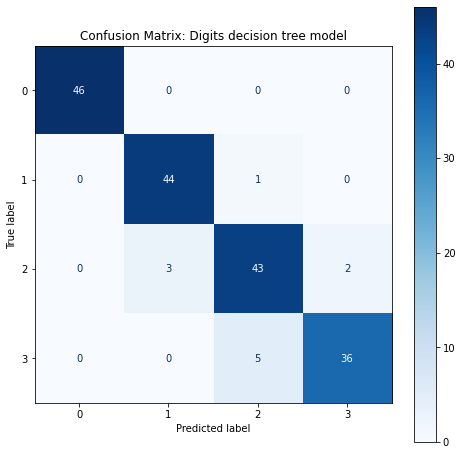

In [21]:
#plot the decision matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))

plot_confusion_matrix(dt_classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)

ax.set_title('Confusion Matrix: Digits decision tree model')


In [23]:
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.94      0.98      0.96        45
           2       0.88      0.90      0.89        48
           3       0.95      0.88      0.91        41

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



# Objective 03 - understand the relationships between precision, recall, thresholds, and predicted probabilities


In [25]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

#create the data(feature,matrix)
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, n_informative=3, random_state=42)

#split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

#create and fit the model
logreg_classifier = LogisticRegression().fit(X_train, y_train)

In [26]:
# the value of the 10th observation
print('The 10th observation: ', X_test[10:11])
# print out the probability for the 10th observation
print('Predicted probability for the 10th observation: ',
      logreg_classifier.predict_proba(X_test)[10:11])
# Print the two classes
print('The two classes: ')
logreg_classifier.classes_


The 10th observation:  [[ 0.51463315  1.09654769  1.16939448  1.33692999 -0.94671578]]
Predicted probability for the 10th observation:  [[0.00965565 0.99034435]]
The two classes: 


array([0, 1])

In [27]:
# Check the class of the 10th observation
logreg_classifier.predict(X_test[10:11])


array([1])

# Objective 04 - use the classification metric ROC AUC to interpret a classifier model